In [1]:
import pandas as pd

In [2]:
import jieba
import jieba.analyse

from os import path
from scipy.misc import imread
from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Q1data.csv',encoding='GB18030')
df.head(2)

,序号,开始时间,结束时间,时长,日期,企业名称,客户联系人,联系方式,产品类别,客户类别,来源,问题类型,硬件类别及型号,处理方式,问题描述,解决方案,问题处理人,开始,结束
0,1,12:28:00,12:43:00,NaN,2018-01-02,西藏翰兴商贸有限公司,符,739992403,租用,成交客户,企业QQ,软硬件操作指导,NaN,在线解答,问题描述：咨询大华网络摄像头使用的问题。,解决方法：给予解答,曾剑滨,2018-01-02 12:28:00,2018-01-02 12:43:00
1,2,13:01:00,13:22:00,NaN,2018-01-02,阿拉善左旗光伏发电有限公司,NaN,379521823,买断,渠道商,企业QQ,电脑系统问题,NaN,QQ远程,问题描述：客户端登录进去会闪退。,解决方法：旧版本，升级为新版本就正常了。,曾剑滨,2018-01-02 13:01:00,2018-01-02 13:22:00


In [4]:
df['问题描述'] = df['问题描述'].str.replace('问题描述：','')
df['问题描述'][:10]

0      咨询大华网络摄像头使用的问题。
1          客户端登录进去会闪退。
2       客户端那里提示disable
3          咨询了软件的相关操作。
4         老师反馈学生那里有杂音，
5          外接音频软件没有声音。
6            图像看起来会卡顿。
7          中午有咨询使用的问题，
8    说要进入会议室协助测试下并解答问题
9         会议室无法远程遥控摄像头
Name: 问题描述, dtype: object

In [5]:
# lines = []
# for i in df['问题描述'][:]:
#     lines.append(i)
# type(lines)
# lines[:10]

In [6]:
words = ''
for word in df.问题描述:
    words = words + ' ' + word
len(words)

58227

In [7]:
stopwords_path = 'F:/cn_font/stop_words/stop_words.txt'
# Chinese fonts must be set
font_path = 'F:/cn_font/SourceHanSerifSC_EL-M/SourceHanSerifSC-Regular.otf'

# special words
userdict_list = ['mcu', 'MCU', '一体机']

In [8]:
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.split('\n')

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)

In [9]:
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2,)
wc.generate(jieba_processing_txt(words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chimo\AppData\Local\Temp\jieba.cache
Loading model cost 0.809 seconds.
Prefix dict has been built succesfully.


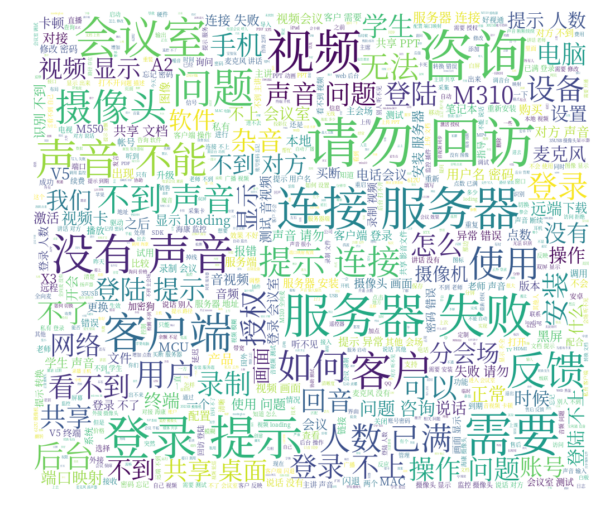

In [29]:
plt.figure(figsize=(10,10))
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
words = ''
for word in df.问题描述:
    w = ' '.join(jieba.cut(word,HMM=False))
    words = words + ' ' + w
len(words)

82823

In [23]:
tags = jieba.analyse.extract_tags(words, topK=15, withWeight=True)

for tag in tags:
        print("tag: %s\t\t weight: %f" % (tag[0],tag[1]))

tag: 服务器		 weight: 0.277016
tag: 登录		 weight: 0.227558
tag: 声音		 weight: 0.192474
tag: 视频		 weight: 0.175610
tag: 提示		 weight: 0.162991
tag: 回访		 weight: 0.161196
tag: 请勿		 weight: 0.148847
tag: 客户端		 weight: 0.146014
tag: 会议室		 weight: 0.139003
tag: 摄像头		 weight: 0.127656
tag: 咨询		 weight: 0.127138
tag: 连接		 weight: 0.117217
tag: 失败		 weight: 0.097260
tag: 不到		 weight: 0.096497
tag: 共享		 weight: 0.089736


In [22]:
for x, w in jieba.analyse.textrank(words, withWeight=True):
    print('%s %s' % (x, w))

声音 1.0
服务器 0.9166890988720044
登录 0.7269984923465133
提示 0.7260404212171493
问题 0.6430376643422566
咨询 0.6347760000371052
视频 0.5934075783035064
需要 0.5815116465582875
连接 0.5441546897704722
没有 0.5039749946061025
失败 0.497329702883013
不到 0.4413813361652748
会议室 0.439473733338807
客户端 0.39749030494407744
客户 0.3680001519857675
摄像头 0.3613666324641536
共享 0.3551098238148324
显示 0.3295246965796771
反馈 0.3005083946182875
使用 0.2853079987817865
